# **QUESTION 1**

In [ ]:
a = int(input('Enter a Number: '))
squared_value = a ** 2

if squared_value >= 100:
    print(squared_value, "is big")
elif squared_value >= 50:
    print(squared_value, "is medium")
else:
    print("Too small to bother with")


Enter a Number: 16
256 is big


# Question 2

In [ ]:
from google.colab import files
uploaded= files.upload( )

Saving Titanic.csv to Titanic (1).csv


In [ ]:
titanic = []
with open('Titanic.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        print(dict(r))

{'last': 'Abbing', 'first': 'Mr. Anthony', 'gender': 'M', 'age': '42', 'class': '3', 'fare': '7.55', 'embarked': 'Southampton', 'survived': 'no'}
{'last': 'Abbott', 'first': 'Mrs. Stanton (Rosa Hunt)', 'gender': 'F', 'age': '35', 'class': '3', 'fare': '20.25', 'embarked': 'Southampton', 'survived': 'yes'}
{'last': 'Abbott', 'first': 'Mr. Rossmore Edward', 'gender': 'M', 'age': '16', 'class': '3', 'fare': '20.25', 'embarked': 'Southampton', 'survived': 'no'}
{'last': 'Abelson', 'first': 'Mr. Samuel', 'gender': 'M', 'age': '30', 'class': '2', 'fare': '24.00', 'embarked': 'Cherbourg', 'survived': 'no'}
{'last': 'Abelson', 'first': 'Mrs. Samuel (Hannah Wizosky)', 'gender': 'F', 'age': '28', 'class': '2', 'fare': '24.00', 'embarked': 'Cherbourg', 'survived': 'yes'}
{'last': 'Adahl', 'first': 'Mr. Mauritz Nils Martin', 'gender': 'M', 'age': '30', 'class': '3', 'fare': '7.25', 'embarked': 'Southampton', 'survived': 'no'}
{'last': 'Adams', 'first': 'Mr. John', 'gender': 'M', 'age': '26', 'clas

In [ ]:
df = pd.read_csv("Titanic.csv")
Age_Above_50 = df.loc[(df['first'].str.startswith('Mrs.')) & (df['age'] > 50.0) & (df['embarked'] == 'Cherbourg')]
total = Age_Above_50['last'].count()
print(total)

4


In [ ]:
Age_Above_30 = df.loc[(df['first'].str.startswith('Mrs.')) & (df['age'] > 30.0) & (df['embarked'] == 'Cherbourg')]
total = Age_Above_30['last'].count()
print(total)

12


In [ ]:
Titanic = []
with open('Titanic.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        Titanic.append(dict(r))

In [ ]:
Twins = []
for i, P1 in enumerate(Titanic):
    for j, P2 in enumerate(Titanic):
        if i >= j:
            continue
        if P1['last'] == P2['last'] and P1['embarked'] == P2['embarked']:
            if P1['age'] != '' and P2['age'] != '':
                age1 = float(P1['age'])
                age2 = float(P2['age'])
                if age1 < 18 and age2 < 18 and age1 == age2:
                    Twins.append((P1['first'], P2['first'], age1, P1['embarked']))

for pair in Twins:
    print('Twins: ', pair[0] , pair[1], 'Age: ', pair[2], 'Embraked: ', pair[3])

Twins:  Miss Helene Barbara Miss Eugenie Age:  0.75 Embraked:  Cherbourg
Twins:  Mr. Jovo Mr. Petar Age:  17.0 Embraked:  Southampton


# Question 3

In [ ]:
import csv
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded= files.upload( )

Saving Titanic.csv to Titanic (2).csv


In [ ]:
# Reading the file in csv as dataframes
f = open('Titanic.csv')
titanic = pd.read_csv(f)

In [ ]:
Women = titanic[(titanic['gender'] == 'F') & (titanic['age'] > 50) & (titanic['embarked'] == 'Cherbourg')]
count = len(Women)
print(f'{count}')

6


In [ ]:
Missing = pd.isnull(titanic['age'])
MissingAges = titanic[Missing]
MissingAges_Total = len(MissingAges)
print(f'{MissingAges_Total}')
average_fare = MissingAges['fare'].mean()
print(f'{average_fare:.2f}')

177
22.16


In [ ]:
titanic['fare'] = titanic['fare'].astype(float)
titanic['age'] = titanic['age'].astype(float)

Male = titanic[titanic['gender'] == 'M']
Female = titanic[titanic['gender'] == 'F']

M_Survivors = Male[Male['survived'] == 'yes']
Rate_Of_M_Survivors = M_Survivors['fare'].max()

M_Non_Survivors = Male[Male['survived'] == 'no']
Rate_Of_M_Non_Survivors = M_Non_Survivors['fare'].max()

F_Survivors = Female[Female['survived'] == 'yes']
Rate_Of_F_Survivors = F_Survivors['fare'].max()

F_Non_Survivors = Female[Female['survived'] == 'no']
Rate_Of_F_Non_Survivors = F_Non_Survivors['fare'].max()

print("Highest fare paid by male survivors: ", Rate_Of_M_Survivors, \n
      "Highest fare paid by female survivors: ", Rate_Of_M_Non_Survivors,
      "Highest fare paid by male non-survivors: ", Rate_Of_F_Survivors,
      "Highest fare paid by female non-survivors: ", Rate_Of_F_Non_Survivors)

Highest fare paid by male survivors:  512.33 Highest fare paid by female survivors:  263.0 Highest fare paid by male non-survivors:  512.33 Highest fare paid by female non-survivors:  151.55


# Question 4

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Titanic = []
with open('Titanic.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        Titanic.append(dict(r))

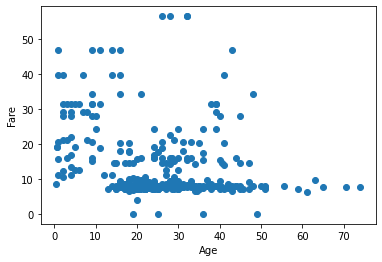

In [ ]:
Third_Class = titanic[titanic['class'] == 3]
plt.scatter(Third_Class['age'], Third_Class['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

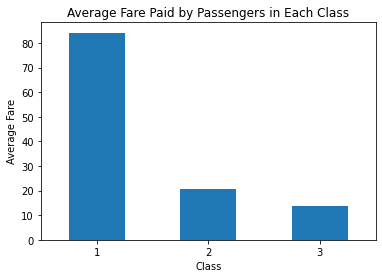

In [ ]:
Class = titanic.groupby('class')
Avg_Fare = Class['fare'].mean()
Avg_Fare.plot(kind='bar', rot=0)
bars = ['First', 'Secound', 'Third']
plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.title('Average Fare Paid by Passengers in Each Class')
plt.show()


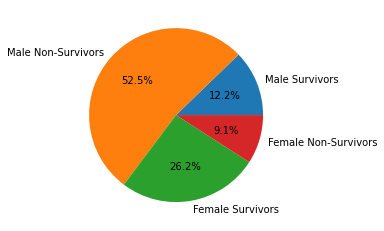

In [ ]:
M = titanic[(titanic['gender'] == 'M') & (titanic['survived'] == 'yes')].shape[0]
NM = titanic[(titanic['gender'] == 'M') & (titanic['survived'] == 'no')].shape[0]
F = titanic[(titanic['gender'] == 'F') & (titanic['survived'] == 'yes')].shape[0]
NF = titanic[(titanic['gender'] == 'F') & (titanic['survived'] == 'no')].shape[0]

labels = ['Male Survivors', 'Male Non-Survivors', 'Female Survivors', 'Female Non-Survivors']
sizes = [M, NM, F, NF]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

# Question 5

In [ ]:
import csv
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded= files.upload( )

Saving Titanic.csv to Titanic (2).csv


In [ ]:
# Reading the file in csv as dataframes
f = open('Titanic.csv')
titanic = pd.read_csv(f)

In [ ]:
# Convertin gender and embarked to numeric values and missing ages to average age
agesNN = []
for i in range(len(titanic)):
  if not pd.isnull(titanic.loc[i]['age']):
    agesNN.append(titanic.loc[i]['age'])
avgage = np.average(agesNN)

In [ ]:
ages = [] # List of ages without null values
genders = [] # List of Men in gender as 0 and others as 1
embarkeds = []  # List of people in Cherbourg as 0, in Southamptons as 1 and others in 2
for i in range(len(titanic)):
  if pd.isnull(titanic.loc[i]['age']):
    ages.append(avgage)
  else:
    ages.append(titanic.loc[i]['age'])
  if titanic.loc[i]['gender'] == 'M':
    genders.append(0)
  else:
    genders.append(1)
  if titanic.loc[i]['embarked'] == 'Cherbourg':
    embarkeds.append(0)
  elif titanic.loc[i]['embarked'] == 'Southamptons':
    embarkeds.append(1)
  else:
    embarkeds.append(2)
titanic['age'] = ages
titanic['gender'] = genders
titanic['embarked'] = embarkeds

In [ ]:
numitems = len(titanic)
percenttrain = 0.96
numtrain = int(numitems*percenttrain) # Number of training items is decided
numtest = numitems - numtrain
print('Training set', numtrain, 'items')
print('Test set', numtest, 'items')
titanicTrain = titanic[0:numtrain]
titanicTest = titanic[numtrain:]

Training set 855 items
Test set 36 items


In [ ]:
features = ['gender', 'age', 'class', 'fare', 'embarked']
neighbors = 10
classifier = KNeighborsClassifier(neighbors)
classifier.fit(titanicTrain[features], titanicTrain['survived'])
predictions = classifier.predict(titanicTest[features])

In [ ]:
numtrain = len(titanicTrain)
numtest = len(titanicTest)
correct = 0
for i in range(numtest):
  print('Predicted' , predictions[i], 'Actual', titanicTest.loc[numtrain+i]['survived'])
  if predictions[i] == titanicTest.loc[numtrain+i]['survived']:
    correct+=1
print('Accuracy:', correct/numtest)

Predicted no Actual no
Predicted no Actual no
Predicted no Actual yes
Predicted yes Actual yes
Predicted no Actual yes
Predicted yes Actual no
Predicted yes Actual yes
Predicted no Actual no
Predicted no Actual no
Predicted yes Actual no
Predicted yes Actual yes
Predicted yes Actual yes
Predicted no Actual no
Predicted yes Actual no
Predicted no Actual no
Predicted yes Actual yes
Predicted no Actual no
Predicted no Actual yes
Predicted yes Actual no
Predicted no Actual no
Predicted no Actual no
Predicted no Actual no
Predicted no Actual no
Predicted no Actual no
Predicted no Actual yes
Predicted no Actual no
Predicted no Actual no
Predicted no Actual yes
Predicted yes Actual yes
Predicted no Actual no
Predicted no Actual no
Predicted no Actual no
Predicted no Actual no
Predicted no Actual no
Predicted no Actual no
Predicted no Actual no
Accuracy: 0.75


**Increasing Accuracy**

In [ ]:
import csv # Import the csv module to read the Titanic data csv file
import numpy as np # Import the numpy library for numerical operations
import pandas as pd # Import the pandas library for data manipulation
from sklearn.neighbors import KNeighborsClassifier # Import the KNeighborsClassifier class from scikit-learn's neighbors module

f = open('Titanic.csv') # Open the Titanic.csv file
titanic = pd.read_csv(f) # Read the csv file into a pandas DataFrame

agesNN = [] # Create a list to store the non-null ages in the titanic DataFrame

for i in range(len(titanic)): # Loop over all the rows in the titanic DataFrame
  if not pd.isnull(titanic.loc[i]['age']): # Check if the current row's age value is not null
    agesNN.append(titanic.loc[i]['age']) # If the age value is not null, append it to the agesNN list
avgage = np.average(agesNN) # Calculate the average age

# Create a list to store the ages, genders, and embarkation ports of all passengers
ages = []
genders = []
embarkeds = []

# Loop over all the rows in the titanic DataFrame
for i in range(len(titanic)):
  if pd.isnull(titanic.loc[i]['age']) : ages.append(avgage) # Check if the current row's age value is null
  else: ages.append(titanic.loc[i]['age']) # If the age value is null, replace it with the average age
  if (titanic.loc[i]['gender']) == 'M': genders.append(0)  # If the age value is not null, add it to the ages list
  else: genders.append(1) # Check the gender of the current passenger If the passenger is male, encode it as 0,  # If the passenger is female, encode it as 1
  if (titanic.loc[i]['embarked']) == 'Cherbourg' : embarkeds.append(0)
  elif (titanic.loc[i]['embarked']) == 'Southampton' : embarkeds.append(1)
  else: embarkeds.append(2)

# Add the ages, genders, and embarkation ports lists as columns to the titanic DataFrame
titanic['age'] = ages
titanic['gender'] = genders
titanic['embarked'] = embarkeds

numitems = len(titanic) # Get the number of items in the titanic DataFrame
percenttrain = 0.98 # Define the percentage of the titanic data to be used for training
numtrain = int(numitems*percenttrain) # Calculate the number of items to be used for training
numtest = numitems - numtrain #Get the training data from the titanic DataFrame
print('Training set', numtrain, 'items')
print('Test data', numtest, 'items')

titanicTrain = titanic[0:numtrain] #Get the testing and training data from the titanic DataFrame
titanicTest = titanic[numtrain:]

features = ['gender','age','class','fare', 'embarked'] #Get the input features for the K-NN classifier
neighbors = 6
classifier = KNeighborsClassifier(neighbors)
classifier.fit(titanicTrain[features], titanicTrain['survived']) #Get the target feature for the K-NN classifier
predictions = classifier.predict(titanicTest[features])

numtrain = len(titanicTrain)
numtest = len(titanicTest)
correct = 0

for i in range(numtest):
  #print('Predicted: ', predictions[i], 'Actual: ', titanicTest.loc[numtrain+i]['survived'])
  if predictions[i] == titanicTest.loc[numtrain+i]['survived']:
    correct = correct + 1
print('Accuracy: ', correct/numtest) #Calculate the accuracy of the K-NN classifier

#highest accuracy i could get was with KNN = 6 neighbors, 0.83